<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da09_gapminder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* github에 저장된 gapminder.tsv 파일을 읽고, DataFrame 생성하세요.

In [2]:
file_path = 'https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/gapminder.tsv'

In [3]:
gapminder = pd.read_csv(file_path, sep='\t')
# 탭으로 값들이 구분된 파일인 경우 sep='\t'

* DataFrame의 정보를 출력하세요.

In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


* DataFrame에서 첫 5개 row와 마지막 5개 row를 출력하세요.

In [5]:
gapminder.head()  # gapminder.iloc[:5]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
gapminder.tail()  # gapminer.iloc[-5:]

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


* DataFrame에서 숫자 타입 변수들의 기술 통계량을 출력하세요.

In [7]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


* DataFrame에 있는 국가 이름의 개수를 찾으세요.

In [10]:
len(gapminder['country'].unique())

142

* DataFrame에 있는 (중복되지 않는) 모든 대륙 이름들을 찾으세요.

In [11]:
gapminder['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

* DataFrame에 있는 연도의 개수를 찾으세요.

In [13]:
len(gapminder['year'].unique())

12

* DataFrame에서 국가 이름, 연도, 1인당 GDP 컬럼을 선택하세요.

In [15]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [17]:
cols = ['country', 'year', 'gdpPercap']
type(cols)

list

In [18]:
gapminder[cols]

,country,year,gdpPercap
0,Afghanistan,1952,779.445314
1,Afghanistan,1957,820.853030
2,Afghanistan,1962,853.100710
3,Afghanistan,1967,836.197138
4,Afghanistan,1972,739.981106
...,...,...,...
1699,Zimbabwe,1987,706.157306
1700,Zimbabwe,1992,693.420786
1701,Zimbabwe,1997,792.449960
1702,Zimbabwe,2002,672.038623


In [19]:
gapminder.loc[:, cols]

,country,year,gdpPercap
0,Afghanistan,1952,779.445314
1,Afghanistan,1957,820.853030
2,Afghanistan,1962,853.100710
3,Afghanistan,1967,836.197138
4,Afghanistan,1972,739.981106
...,...,...,...
1699,Zimbabwe,1987,706.157306
1700,Zimbabwe,1992,693.420786
1701,Zimbabwe,1997,792.449960
1702,Zimbabwe,2002,672.038623


* DataFrame에서 1인당 GDP의 최솟값, 최댓값을 찾으세요.

In [21]:
# pd.Series.max() 메서드
gapminder['gdpPercap'].max()

113523.1329

In [22]:
# pd.Series.min() 메서드
gapminder['gdpPercap'].min()

241.16587650000002

* DataFrame에서 1인당 GDP가 최소/최대인 row를 찾으세요.

In [23]:
gapminder[gapminder.gdpPercap == gapminder.gdpPercap.max()]

,country,continent,year,lifeExp,pop,gdpPercap
853,Kuwait,Asia,1957,58.033,212846,113523.1329


In [24]:
gapminder[gapminder.gdpPercap == gapminder.gdpPercap.min()]

,country,continent,year,lifeExp,pop,gdpPercap
334,"Congo, Dem. Rep.",Africa,2002,44.966,55379852,241.165877


In [25]:
gapminder[(gapminder.gdpPercap == gapminder.gdpPercap.max()) | 
          (gapminder.gdpPercap == gapminder.gdpPercap.min())]

,country,continent,year,lifeExp,pop,gdpPercap
334,"Congo, Dem. Rep.",Africa,2002,44.966,55379852,241.165877
853,Kuwait,Asia,1957,58.033,212846,113523.132900


* DataFrame에서 기대수명(lifeExp)의 최솟값/최댓값을 찾으세요.

In [26]:
gapminder.lifeExp.max()

82.603

In [27]:
gapminder.lifeExp.min()

23.599

* DataFrame에서 기대수명(lifeExp)이 최소/최대인 row를 찾으세요.

In [28]:
gapminder[(gapminder.lifeExp == gapminder.lifeExp.max()) |
          (gapminder.lifeExp == gapminder.lifeExp.min())]

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.068060
1292,Rwanda,Africa,1992,23.599,7290203,737.068595


In [29]:
gapminder[gapminder.country == 'Rwanda']

,country,continent,year,lifeExp,pop,gdpPercap
1284,Rwanda,Africa,1952,40.000,2534927,493.323875
1285,Rwanda,Africa,1957,41.500,2822082,540.289398
1286,Rwanda,Africa,1962,43.000,3051242,597.473073
1287,Rwanda,Africa,1967,44.100,3451079,510.963714
1288,Rwanda,Africa,1972,44.600,3992121,590.580664
1289,Rwanda,Africa,1977,45.000,4657072,670.080601
1290,Rwanda,Africa,1982,46.218,5507565,881.570647
1291,Rwanda,Africa,1987,44.020,6349365,847.991217
1292,Rwanda,Africa,1992,23.599,7290203,737.068595
1293,Rwanda,Africa,1997,36.087,7212583,589.944505


In [30]:
gapminder[gapminder.country == 'Japan']

,country,continent,year,lifeExp,pop,gdpPercap
792,Japan,Asia,1952,63.030,86459025,3216.956347
793,Japan,Asia,1957,65.500,91563009,4317.694365
794,Japan,Asia,1962,68.730,95831757,6576.649461
795,Japan,Asia,1967,71.430,100825279,9847.788607
796,Japan,Asia,1972,73.420,107188273,14778.786360
797,Japan,Asia,1977,75.380,113872473,16610.377010
798,Japan,Asia,1982,77.110,118454974,19384.105710
799,Japan,Asia,1987,78.670,122091325,22375.941890
800,Japan,Asia,1992,79.360,124329269,26824.895110
801,Japan,Asia,1997,80.690,125956499,28816.584990


* 연도별 기대수명(lifeExp)의 평균을 출력하세요.

In [43]:
years = gapminder['year'].unique()

lifeExp_by_year = []  # 연도별 기대수명의 평균을 저장할 리스트
for y in years:
    subset = gapminder[gapminder.year == y]  # 데이터프레임에서 각 연도 부분집합 - 분리(split)
    avg = subset['lifeExp'].mean()  # 부분집합에서 평균 계산 - 적용(apply)
    lifeExp_by_year.append(avg)  # 리스트에 계산된 평균값을 추가 - 결합(combine)

# 리스트를 pd.Series 객체로 변환
lifeExp_by_year = pd.Series(data=lifeExp_by_year, index=years, name='lifeExp')
lifeExp_by_year

1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [32]:
gapminder.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [34]:
gapminder['lifeExp'].groupby(gapminder['year']).mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

* 연도별 기대수명(lifeExp)의 평균을 그래프로 그리세요.

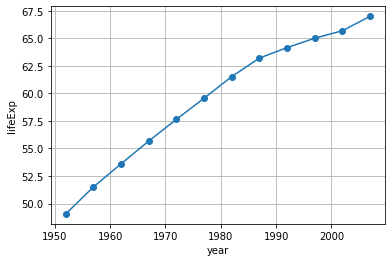

In [50]:
# pd.Series 객체의 index 속성과 values 속성을 각각 x축, y축으로 설정해서 그래프를 그림.
plt.plot(lifeExp_by_year.index, lifeExp_by_year.values, 'o-')
plt.xlabel('year')
plt.ylabel('lifeExp')
plt.grid()
plt.show()

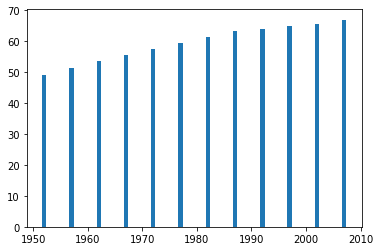

In [49]:
plt.bar(x=lifeExp_by_year.index, height=lifeExp_by_year.values)
plt.show()

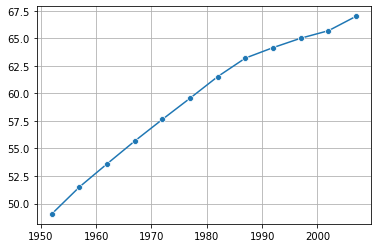

In [62]:
sns.lineplot(x=lifeExp_by_year.index, y=lifeExp_by_year.values, marker='o')
plt.grid()
plt.show()

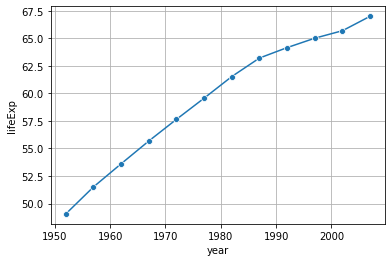

In [60]:
# seaborn 모듈의 함수들은 그룹별 통계(estimator)를 계산해서 그래프를 그려주는 기능을 가지고 있음.
# estimator의 기본값은 평균(mean).
sns.lineplot(x='year', y='lifeExp', data=gapminder, marker='o', err_style=None)
plt.grid()
plt.show()

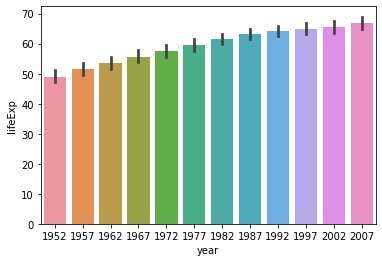

In [65]:
sns.barplot(x='year', y='lifeExp', data=gapminder)
plt.show()

* 연도별 1인당 GDP의 평균을 출력하세요.

In [70]:
gdp_by_year = []  # 연도별 1인당 GDP를 저장하기 위한 리스트
for y in years:
    subset = gapminder[gapminder.year == y]  # 각 연도별 부분집합 - 분리(Split)
    avg = subset['gdpPercap'].mean()  # 각 부분집합에서 통계값 계산 - 적용(Apply)
    gdp_by_year.append(avg)  # 계산된 값을 리스트 추가 - 결합(Combine)

# 리스트를 pd.Series 객체 변환
gdp_by_year = pd.Series(data=gdp_by_year, index=years, name='gdpPercap')
gdp_by_year

1952     3725.276046
1957     4299.408345
1962     4725.812342
1967     5483.653047
1972     6770.082815
1977     7313.166421
1982     7518.901673
1987     7900.920218
1992     8158.608521
1997     9090.175363
2002     9917.848365
2007    11680.071820
Name: gdpPercap, dtype: float64

In [71]:
gapminder.groupby('year')['gdpPercap'].mean()

year
1952     3725.276046
1957     4299.408345
1962     4725.812342
1967     5483.653047
1972     6770.082815
1977     7313.166421
1982     7518.901673
1987     7900.920218
1992     8158.608521
1997     9090.175363
2002     9917.848365
2007    11680.071820
Name: gdpPercap, dtype: float64

* 연도별 1인당 GDP의 평균을 그래프로 그리세요.

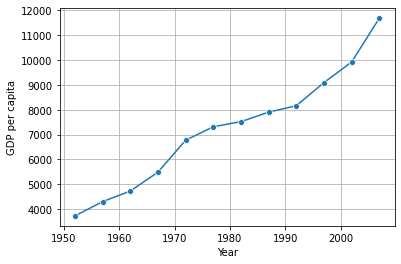

In [75]:
# groupby 메서드의 결과를 이용해서 시각화
sns.lineplot(x=gdp_by_year.index, y=gdp_by_year.values, marker='o')
plt.grid()
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()

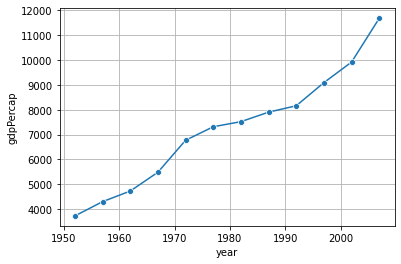

In [78]:
# seaborn 모듈의 함수들을 그룹별 통계 함수 적용 기능을 가지고 있음.
sns.lineplot(x='year', y='gdpPercap', data=gapminder, marker='o', err_style=None)
plt.grid()
plt.show()

* 연도별 전세계 인구를 출력하세요.

In [79]:
pop_by_year = gapminder.groupby('year')['pop'].sum()
pop_by_year

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: pop, dtype: int64

* 연도별 전세계 인구를 그래프로 그리세요.

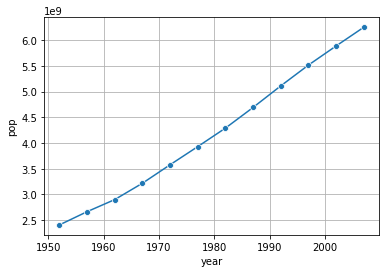

In [82]:
sns.lineplot(data=pop_by_year, marker='o')  # groupby 결과를 사용한 시각화
plt.grid()
plt.show()

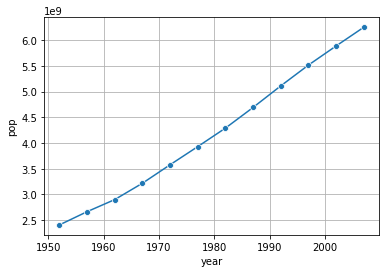

In [86]:
# seaborn 모듈의 시각화 함수에서 직접 groupby 연산을 수행
# groupby 연산이 평균인 경우에는 생략가능. 평균이 아닌 경우에는 명시.
# estimator의 기본값(default argument)은 'mean'
sns.lineplot(data=gapminder, x='year', y='pop', estimator='sum', 
             marker='o', err_style=None)
plt.grid()
plt.show()

* 연도별 대륙별 전세계 인구를 출력하세요

In [88]:
pop_by_year_cont = gapminder.groupby(['year', 'continent'])['pop'].sum()
pop_by_year_cont  #> 2중 인덱스를 갖는 pd.Series 객체

year  continent
1952  Africa        237640501
      Americas      345152446
      Asia         1395357351
      Europe        418120846
      Oceania        10686006
1957  Africa        264837738
      Americas      386953916
      Asia         1562780599
      Europe        437890351
      Oceania        11941976
1962  Africa        296516865
      Americas      433270254
      Asia         1696357182
      Europe        460355155
      Oceania        13283518
1967  Africa        335289489
      Americas      480746623
      Asia         1905662900
      Europe        481178958
      Oceania        14600414
1972  Africa        379879541
      Americas      529384210
      Asia         2150972248
      Europe        500635059
      Oceania        16106100
1977  Africa        433061021
      Americas      578067699
      Asia         2384513556
      Europe        517164531
      Oceania        17239000
1982  Africa        499348587
      Americas      630290920
      Asia         26101

In [90]:
type(pop_by_year_cont)

pandas.core.series.Series

In [91]:
pop_by_year_cont.index

MultiIndex([(1952,   'Africa'),
            (1952, 'Americas'),
            (1952,     'Asia'),
            (1952,   'Europe'),
            (1952,  'Oceania'),
            (1957,   'Africa'),
            (1957, 'Americas'),
            (1957,     'Asia'),
            (1957,   'Europe'),
            (1957,  'Oceania'),
            (1962,   'Africa'),
            (1962, 'Americas'),
            (1962,     'Asia'),
            (1962,   'Europe'),
            (1962,  'Oceania'),
            (1967,   'Africa'),
            (1967, 'Americas'),
            (1967,     'Asia'),
            (1967,   'Europe'),
            (1967,  'Oceania'),
            (1972,   'Africa'),
            (1972, 'Americas'),
            (1972,     'Asia'),
            (1972,   'Europe'),
            (1972,  'Oceania'),
            (1977,   'Africa'),
            (1977, 'Americas'),
            (1977,     'Asia'),
            (1977,   'Europe'),
            (1977,  'Oceania'),
            (1982,   'Africa'),
        

In [92]:
pop_by_year_cont.values

array([ 237640501,  345152446, 1395357351,  418120846,   10686006,
        264837738,  386953916, 1562780599,  437890351,   11941976,
        296516865,  433270254, 1696357182,  460355155,   13283518,
        335289489,  480746623, 1905662900,  481178958,   14600414,
        379879541,  529384210, 2150972248,  500635059,   16106100,
        433061021,  578067699, 2384513556,  517164531,   17239000,
        499348587,  630290920, 2610135582,  531266901,   18394850,
        574834110,  682753971, 2871220762,  543094160,   19574415,
        659081517,  739274104, 3133292191,  558142797,   20919651,
        743832984,  796900410, 3383285500,  568944148,   22241430,
        833723916,  849772762, 3601802203,  578223869,   23454829,
        929539692,  898871184, 3811953827,  586098529,   24549947])

In [93]:
pop_by_year_cont.loc[(1952, 'Africa')]

237640501

* 연도별 대륙별 전세계 인구를 그래프로 그리세요.

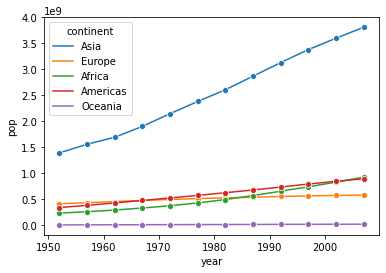

In [95]:
sns.lineplot(data=gapminder, x='year', y='pop', hue='continent', estimator='sum',
             marker='o', err_style=None)
plt.show()

* 대한민국의 레코드만 출력하세요.

In [105]:
gapminder[gapminder['country'] == 'Korea, Rep.']

,country,continent,year,lifeExp,pop,gdpPercap
840,"Korea, Rep.",Asia,1952,47.453,20947571,1030.592226
841,"Korea, Rep.",Asia,1957,52.681,22611552,1487.593537
842,"Korea, Rep.",Asia,1962,55.292,26420307,1536.344387
843,"Korea, Rep.",Asia,1967,57.716,30131000,2029.228142
844,"Korea, Rep.",Asia,1972,62.612,33505000,3030.876650
845,"Korea, Rep.",Asia,1977,64.766,36436000,4657.221020
846,"Korea, Rep.",Asia,1982,67.123,39326000,5622.942464
847,"Korea, Rep.",Asia,1987,69.810,41622000,8533.088805
848,"Korea, Rep.",Asia,1992,72.244,43805450,12104.278720
849,"Korea, Rep.",Asia,1997,74.647,46173816,15993.527960


In [106]:
# str.lower(): 모든 문자들을 소문자로 변환
'Korea, Rep.'.lower()

'korea, rep.'

In [109]:
# str.startswith(패턴): str이 '패턴'으로 시작하는 지
'Korea, Rep.'.startswith('Korea')

True

In [113]:
# pd.Series.str: StringMethods 클래스 객체. 문자열 관련된 기능(메서드)들을 가지고 있는 객체.
gapminder['country'].str.lower()

0       afghanistan
1       afghanistan
2       afghanistan
3       afghanistan
4       afghanistan
           ...     
1699       zimbabwe
1700       zimbabwe
1701       zimbabwe
1702       zimbabwe
1703       zimbabwe
Name: country, Length: 1704, dtype: object

In [114]:
gapminder['country'].str.contains('Korea')

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: country, Length: 1704, dtype: bool

In [116]:
# str 클래스가 가지고 있는 메서드들의 연쇄 호출(chain invoke)
'Korea'.lower().upper()

'KOREA'

In [120]:
# pd.Series에서 문자열 관련 함수를 연쇄 호출하기 위한 방법:
gapminder['country'].str.lower().str.upper()

0       AFGHANISTAN
1       AFGHANISTAN
2       AFGHANISTAN
3       AFGHANISTAN
4       AFGHANISTAN
           ...     
1699       ZIMBABWE
1700       ZIMBABWE
1701       ZIMBABWE
1702       ZIMBABWE
1703       ZIMBABWE
Name: country, Length: 1704, dtype: object

In [121]:
gapminder[gapminder.country.str.lower().str.contains('korea')]

,country,continent,year,lifeExp,pop,gdpPercap
828,"Korea, Dem. Rep.",Asia,1952,50.056,8865488,1088.277758
829,"Korea, Dem. Rep.",Asia,1957,54.081,9411381,1571.134655
830,"Korea, Dem. Rep.",Asia,1962,56.656,10917494,1621.693598
831,"Korea, Dem. Rep.",Asia,1967,59.942,12617009,2143.540609
832,"Korea, Dem. Rep.",Asia,1972,63.983,14781241,3701.621503
833,"Korea, Dem. Rep.",Asia,1977,67.159,16325320,4106.301249
834,"Korea, Dem. Rep.",Asia,1982,69.100,17647518,4106.525293
835,"Korea, Dem. Rep.",Asia,1987,70.647,19067554,4106.492315
836,"Korea, Dem. Rep.",Asia,1992,69.978,20711375,3726.063507
837,"Korea, Dem. Rep.",Asia,1997,67.727,21585105,1690.756814


In [125]:
type(gapminder.country.str)

pandas.core.strings.StringMethods